In [1]:
import os

current_file = os.path.abspath(" ")
print("Şu anda çalıştığınız dosya:", current_file)


Şu anda çalıştığınız dosya: C:\Users\Harun\i-akademi_python\Exploratory Data Analysis\ 


In [7]:
os.chdir('C:\\Users\\Harun\\Desktop\\Yazılım\\i_akademi_veri_bilimi')

## Exploraotory Data Analysis on Diabet Dataset

## Information about dataset attributes -
## 
Pregnancies: To express the Number of pregnancies## 

Glucose: To express the Glucose level in blo## od

BloodPressure: To express the Blood pressure measure## ment

SkinThickness: To express the thickness of th## e skin

Insulin: To express the Insulin level ## in blood

BMI: To express the Body ## mass index

DiabetesPedigreeFunction: To express the Diabete## s percentage

Age: To e## xpress the age

Outcome: To express the final result 1 is Yes and 0 is No

## Import Necessary Libraries

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.3f" %x)

## Impoert DataSet

In [19]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## General Information

In [24]:
def check_df(dataframe):
    print(20*"#", "Head", 20*"#")
    print(dataframe.head())
    print(20*"#", "Tail", 20*"#")
    print(dataframe.tail())
    print(20*"#", "Shape", 20*"#")
    print(dataframe.shape)
    print(20*"#", "Type", 20*"#")
    print(dataframe.dtypes)
    print(20*"#", "NA", 20*"#")
    print(dataframe.isnull().sum())
    print(20*"#", "Quartiles", 20*"#")
    print(dataframe.describe([0, 0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99, 1]).T)

In [26]:
check_df(df)

#################### Head ####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.600                     0.627   50        1
1            1       85             66             29        0 26.600                     0.351   31        0
2            8      183             64              0        0 23.300                     0.672   32        1
3            1       89             66             23       94 28.100                     0.167   21        0
4            0      137             40             35      168 43.100                     2.288   33        1
#################### Tail ####################
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
763           10      101             76             48      180 32.900                     0.171   63        0
764            2      

## Analysis of Categorical and Numerical Variables

In [31]:
def grab_col_nanes(dataframe, cat_th=10, car_th=20, report=False):
    #category
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and str(dataframe[col].dtypes) in ["int64", "float64", "unit8"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(df[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat 
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    #numeric
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64", "uint8"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    if report:
        print(f"Observation: {dataframe.shape[0]}")
        print(f"Observation: {dataframe.shape[1]}")
        print(f"cat_cols: {len(num_cols)}")
        print(f"cat_cols: {len(cat_but_car)}")
        print(f"cat_cols: {len(num_but_cat)}")
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [34]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_nanes(df, report=True)

Observation: 768
Observation: 9
cat_cols: 8
cat_cols: 0
cat_cols: 1


In [36]:
def cat_summary(dataframe, col_name, plot=False):
    print(20*"#", col_name, 20*"#")
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(), 
                 "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

In [38]:
def cat_summary_df(dataframe):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_nanes(dataframe)
    for col in cat_cols:
        if str(dataframe[col].dtypes) == "bool":
            new_df = pd.DataFrame()
            new_df[col] = dataframe[col].astype(int)
            cat_summary(new_df, col, plot=True)
        else:
            cat_summary(dataframe, col, plot=True)

#################### Outcome ####################
         Outcome  Ratio
Outcome                
0            500 65.104
1            268 34.896


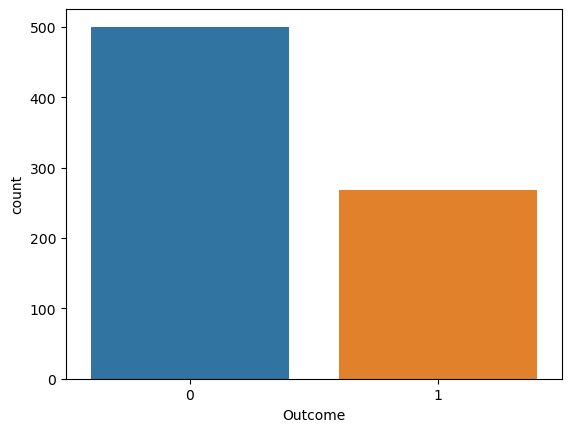

In [40]:
cat_summary_df(df)

In [44]:
def num_summary(dataframe, num_col, plot=False):
    print("20*#", num_col, "20*#")
    quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[num_col].describe(quantiles).T)

    if plot:
        dataframe[num_col].hist(bins=20)
        plt.xlabel(num_col)
        plt.title(num_col)
        plt.show(block=True)

In [46]:
def num_summary_df(dataframe, plot=False):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_nanes(dataframe)
    for col in num_cols:
        num_summary(dataframe, col, plot=True)

20*# Pregnancies 20*#
count   768.000
mean      3.845
std       3.370
min       0.000
1%        0.000
5%        0.000
10%       0.000
20%       1.000
30%       1.000
40%       2.000
50%       3.000
60%       4.000
70%       5.000
80%       7.000
90%       9.000
95%      10.000
99%      13.000
max      17.000
Name: Pregnancies, dtype: float64


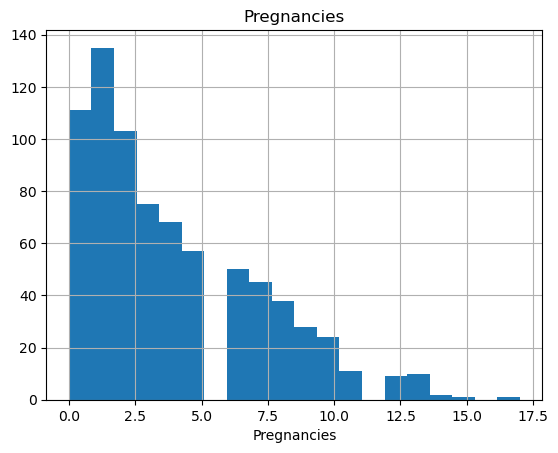

20*# Glucose 20*#
count   768.000
mean    120.895
std      31.973
min       0.000
1%       57.000
5%       79.000
10%      85.000
20%      95.000
30%     102.000
40%     109.000
50%     117.000
60%     125.000
70%     134.000
80%     147.000
90%     167.000
95%     181.000
99%     196.000
max     199.000
Name: Glucose, dtype: float64


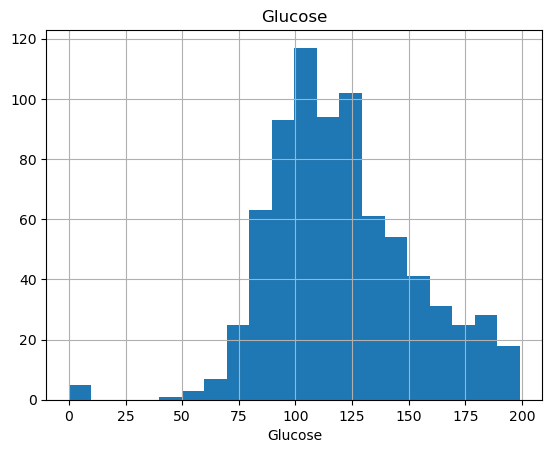

20*# BloodPressure 20*#
count   768.000
mean     69.105
std      19.356
min       0.000
1%        0.000
5%       38.700
10%      54.000
20%      60.000
30%      64.000
40%      68.000
50%      72.000
60%      74.000
70%      78.000
80%      82.000
90%      88.000
95%      90.000
99%     106.000
max     122.000
Name: BloodPressure, dtype: float64


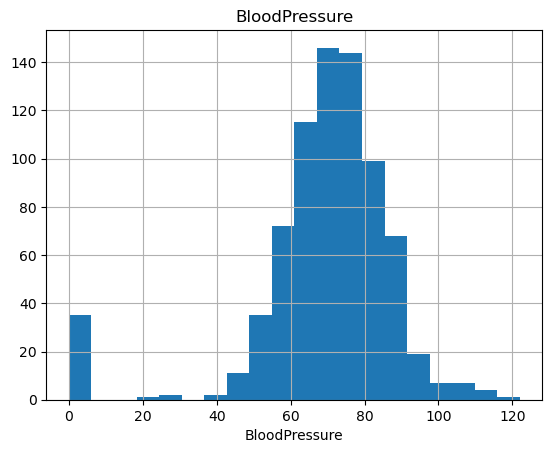

20*# SkinThickness 20*#
count   768.000
mean     20.536
std      15.952
min       0.000
1%        0.000
5%        0.000
10%       0.000
20%       0.000
30%       8.200
40%      18.000
50%      23.000
60%      27.000
70%      31.000
80%      35.000
90%      40.000
95%      44.000
99%      51.330
max      99.000
Name: SkinThickness, dtype: float64


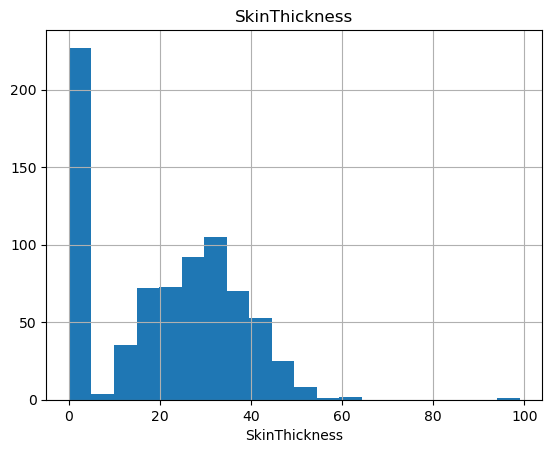

20*# Insulin 20*#
count   768.000
mean     79.799
std     115.244
min       0.000
1%        0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%      30.500
60%      72.200
70%     106.000
80%     150.000
90%     210.000
95%     293.000
99%     519.900
max     846.000
Name: Insulin, dtype: float64


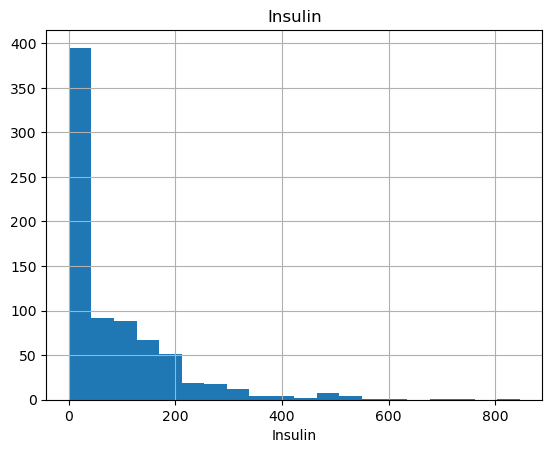

20*# BMI 20*#
count   768.000
mean     31.993
std       7.884
min       0.000
1%        0.000
5%       21.800
10%      23.600
20%      25.900
30%      28.200
40%      30.100
50%      32.000
60%      33.700
70%      35.490
80%      37.800
90%      41.500
95%      44.395
99%      50.759
max      67.100
Name: BMI, dtype: float64


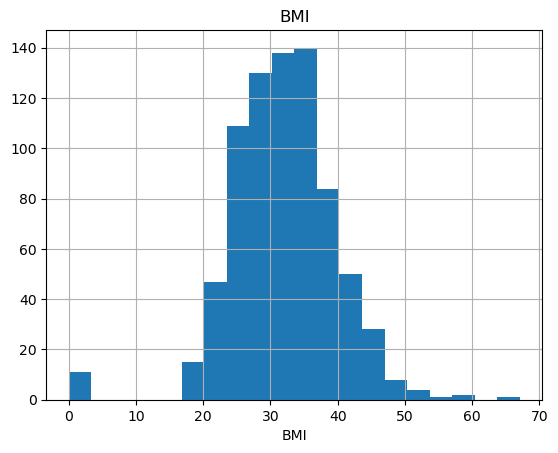

20*# DiabetesPedigreeFunction 20*#
count   768.000
mean      0.472
std       0.331
min       0.078
1%        0.095
5%        0.140
10%       0.165
20%       0.219
30%       0.259
40%       0.303
50%       0.372
60%       0.454
70%       0.564
80%       0.687
90%       0.879
95%       1.133
99%       1.698
max       2.420
Name: DiabetesPedigreeFunction, dtype: float64


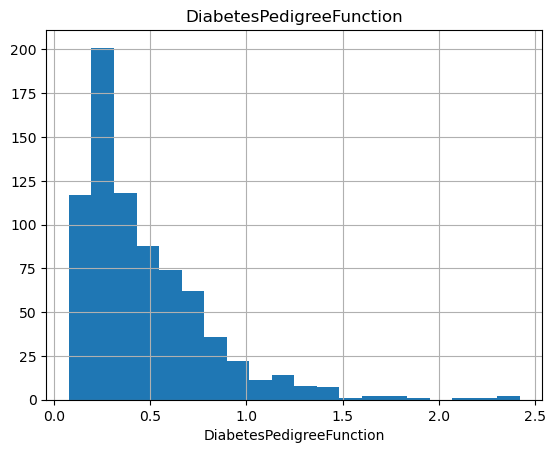

20*# Age 20*#
count   768.000
mean     33.241
std      11.760
min      21.000
1%       21.000
5%       21.000
10%      22.000
20%      23.000
30%      25.000
40%      27.000
50%      29.000
60%      33.000
70%      38.000
80%      42.600
90%      51.000
95%      58.000
99%      67.000
max      81.000
Name: Age, dtype: float64


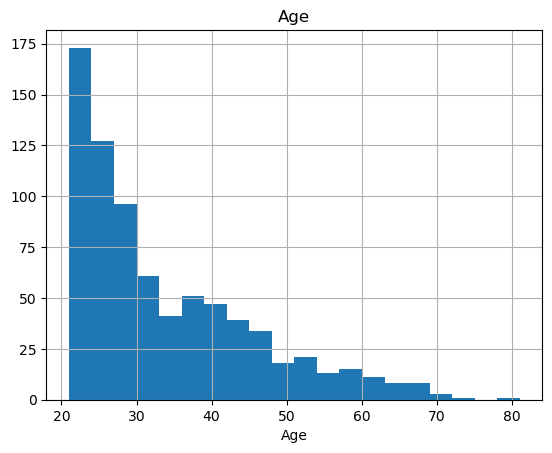

In [48]:
num_summary_df(df)

In [50]:
import warnings
import math

def plot_num_summary(dataframe):
    warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_nanes(dataframe)
    num_plots = len(num_cols)
    rows = math.ceil(num_plots/2)
    cols = 2 if num_plots > 1 else 1
    plt.figure(figsize=(10*cols,4*rows))
    for index, col in enumerate(num_cols):
        plt.subplot(rows, cols, index+1)
        #plt.tight_layout()
        dataframe[col].hist(bins=20)
        plt.title(col)
    plt.tight_layout()
    plt.show()

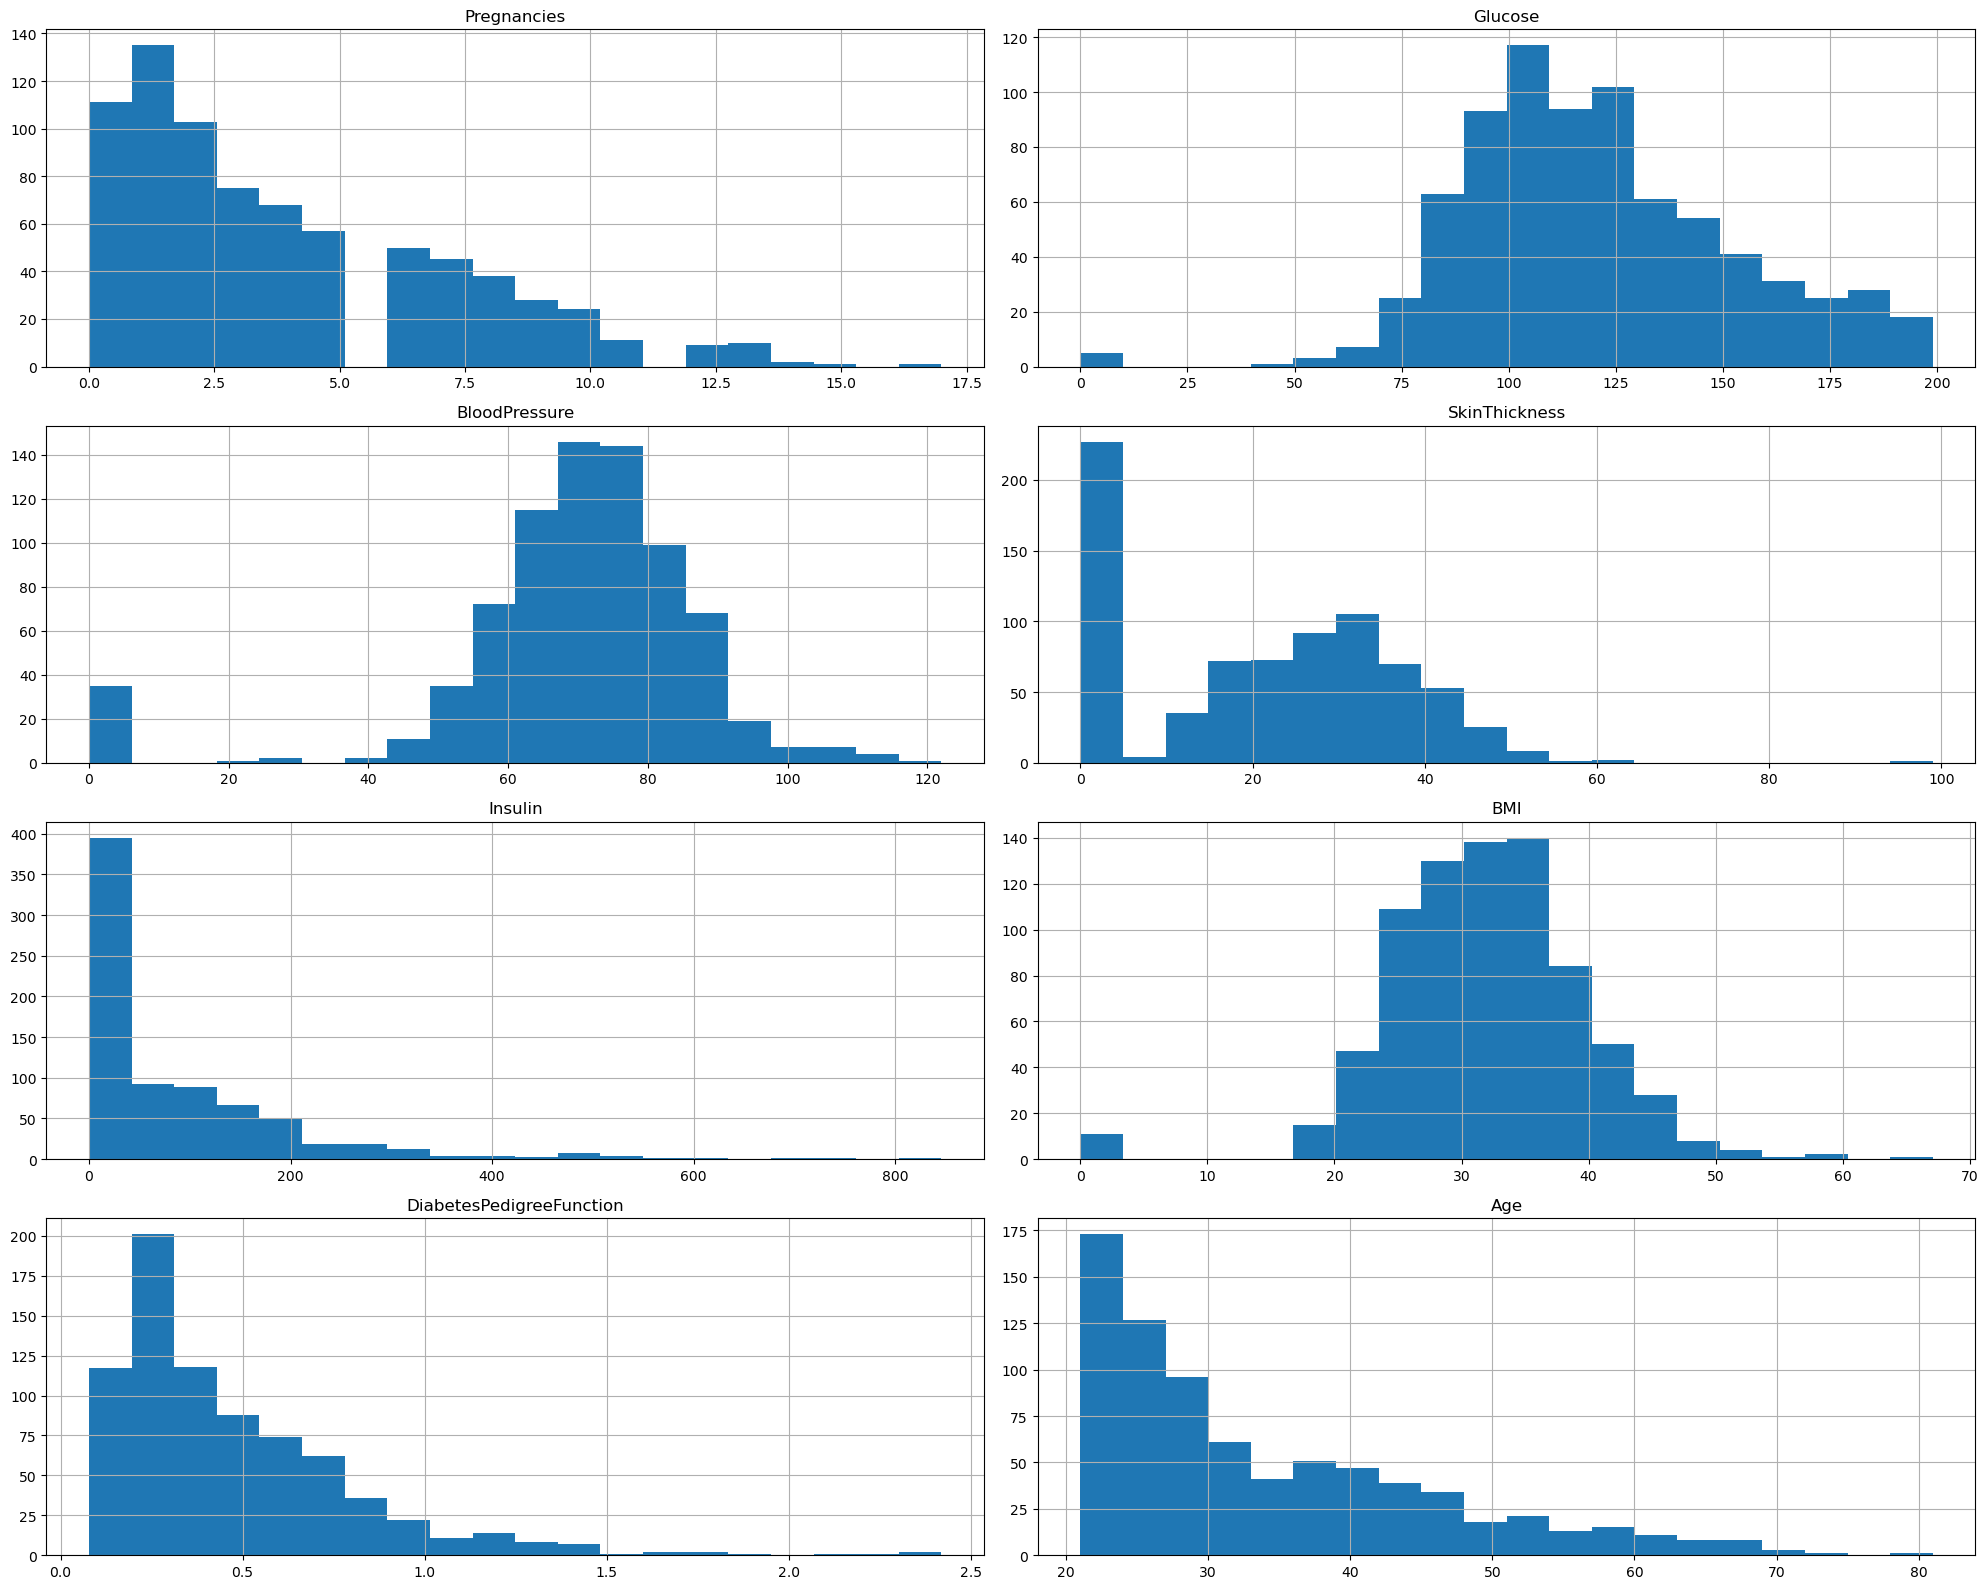

In [52]:
plot_num_summary(df)

## Target Analysis

In [57]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(20*"#", target, "==>", numerical_col, 20*"#")
    print(pd.DataFrame({"Target Mean": dataframe.groupby(target)[numerical_col].mean()}))

In [59]:
def target_summary_with_num_df(dataframe, target):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_nanes(dataframe)
    for col in num_cols:
        target_summary_with_num(dataframe, "survived", col)

## Correlation Analysis

In [66]:
def high_correlated_cols(dataframe, corr_th = 0.90, remove = False, plot=False):
    num_cols= [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64", "unit8"]]
    corr = dataframe[num_cols].corr()
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if drop_list == []:
        print(20*"#", "After Correlation Analysis, You Don't Need to Remove Variables", 20*"#")
    if remove:
        dataframe = dataframe.drop(drop_list, axis=1)
    if plot:
        num_cols= [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64", "unit8"]]
        sns.set(rc={'figure.figsize': (6,3)})
        sns.heatmap(dataframe[num_cols].corr(), cmap="RdBu", annot=True, fmt=".2f")
        plt.show(block=True)
    return drop_list
    

#################### After Correlation Analysis, You Don't Need to Remove Variables ####################


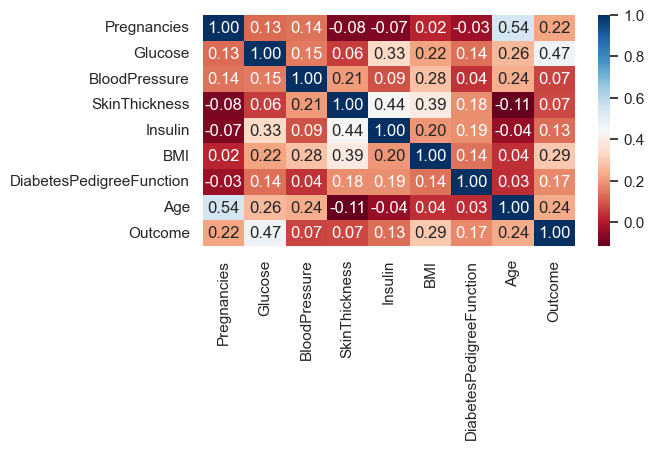

[]

In [68]:
high_correlated_cols(df, remove=True, plot=True)